<a href="https://colab.research.google.com/github/Ianoow/calculator-/blob/main/PROJECT_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDENT DEPRESSION**

Mental health issues, including depression, have become increasingly prevalent among students due to various stressors such as academic pressure, financial constraints, and lifestyle challenges. This analysis aims to explore the factors contributing to student depression by leveraging data that includes demographics, academic performance, lifestyle habits, and mental health indicators.

**Key Objectives:**

Understand Trends: Identify patterns and trends in student
depression based on various demographic and lifestyle factors.

Analyze Risk Factors: Determine the influence of factors such as academic and work pressure, sleep duration, dietary habits, and family history of mental illness.

Predictive Modeling: Build a machine learning model to predict the likelihood of depression among students based on the available features.

**Psychological and Lifestyle Factors**

Academic Pressure,
Sleep Duration,
Dietary Habits,
Study Satisfaction,
Financial Stress1 (low) to 5 (high).


**Target Variable**

The target variable, Depression, is a binary column indicating whether a student is suffering from depression.



Numerical: 5 columns (Age, Academic Pressure, Study Satisfaction, Study Hours, Financial Stress).


Categorical: 6 columns (Gender, Sleep Duration, Dietary Habits, Suicidal Thoughts, Family History, Depression).



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('student depression.csv')
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


In [ ]:
df.shape

(27901, 18)

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


**Checking And Handling missing values**

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
#remove  rows with null  values
updated_df = df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


**Checking for duplicated rows**

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

**Droping unwanted columns**

In [ ]:
df.drop(['City','Work Pressure','Job Satisfaction','Degree','id'], axis=1, inplace=True)

In [ ]:
df['Profession'].value_counts(normalize=True) * 100

,proportion
Profession,
Student,99.888893
Architect,0.028673
Teacher,0.021505
Digital Marketer,0.010752
Chef,0.007168
Content Writer,0.007168
Pharmacist,0.007168
Doctor,0.007168
UX/UI Designer,0.003584


In [ ]:
#removing any other  profession other than students
df = df[df['Profession'] == 'Student']
print(f"DataFrame now contains {len(df)} rows after filtering for 'Student' profession.")

DataFrame now contains 27870 rows after filtering for 'Student' profession.


In [ ]:
df['Profession'].value_counts()

,count
Profession,
Student,27870


**checking and handling outliers**

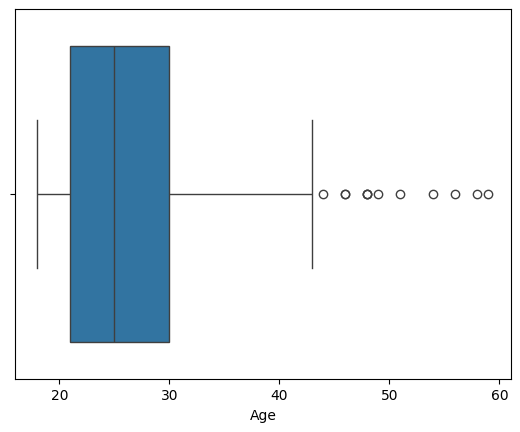

In [ ]:
sns.boxplot(data=df, x="Age")
plt.show()

In [ ]:
columns = ['Age']

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # find outlier
    outliers = column_data[(column_data < lower) | (column_data > upper)]

    # remove outlier
    df_no_outliers = df[(column_data >= lower) & (column_data <= upper)]

In [ ]:
columns = ['Age']
outlier_percentage = {}

for column in columns:
    column_data = df_no_outliers[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}':{percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")


Count of outliers in column 'Age': 0
Percentage of outliers in column 'Age':0.00%

Lower : 7.5
Upper : 43.5

Data Outlier': []


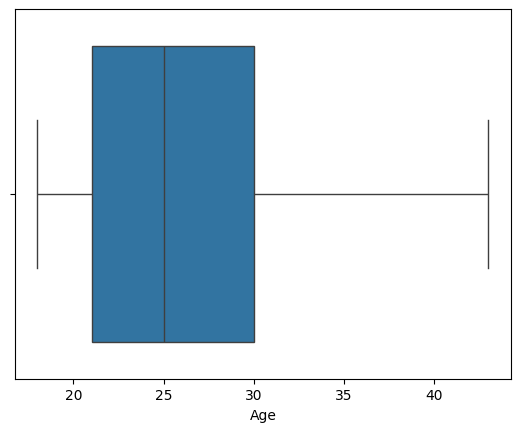

In [ ]:
sns.boxplot(data=df_no_outliers, x="Age")
plt.show()

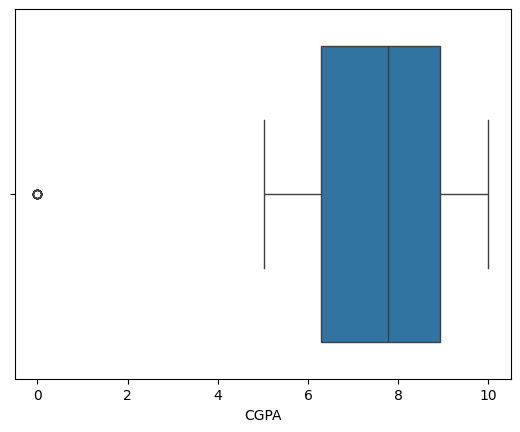

In [ ]:
sns.boxplot(data=df, x="CGPA")
plt.show()

In [ ]:
columns = ['Age']
outlier_percentage = {}

for column in columns:
    column_data = df_no_outliers[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}':{percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")


Count of outliers in column 'Age': 0
Percentage of outliers in column 'Age':0.00%

Lower : 7.5
Upper : 43.5

Data Outlier': []


In [ ]:
columns = ['CGPA']

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # find outlier
    outliers = column_data[(column_data < lower) | (column_data > upper)]

    # remove outlier
    df_no_outliers = df[(column_data >= lower) & (column_data <= upper)]

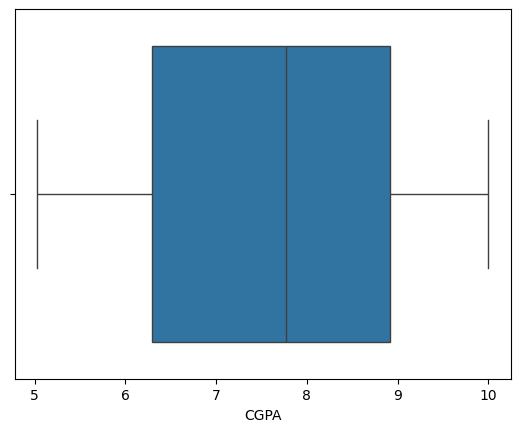

In [ ]:
sns.boxplot(data=df_no_outliers, x="CGPA")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27870 non-null  object 
 1   Age                                    27870 non-null  float64
 2   Profession                             27870 non-null  object 
 3   Academic Pressure                      27870 non-null  float64
 4   CGPA                                   27870 non-null  float64
 5   Study Satisfaction                     27870 non-null  float64
 6   Sleep Duration                         27870 non-null  object 
 7   Dietary Habits                         27870 non-null  object 
 8   Have you ever had suicidal thoughts ?  27870 non-null  object 
 9   Work/Study Hours                       27870 non-null  float64
 10  Financial Stress                       27870 non-null  float64
 11  Family 

In [ ]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000
mean,25.821134,3.140617,7.656028,2.943559,7.157948,3.139505,0.585145
std,4.906574,1.381640,1.470835,1.361209,3.707180,1.437212,0.492706
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


# **Exploratory Data Analysis.**

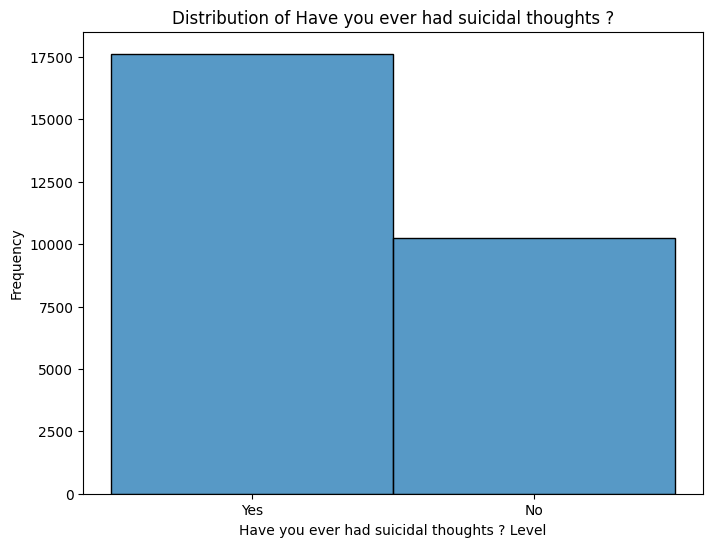

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Have you ever had suicidal thoughts ?'])
plt.title('Distribution of Have you ever had suicidal thoughts ?')
plt.xlabel('Have you ever had suicidal thoughts ? Level')
plt.ylabel('Frequency')
plt.show()

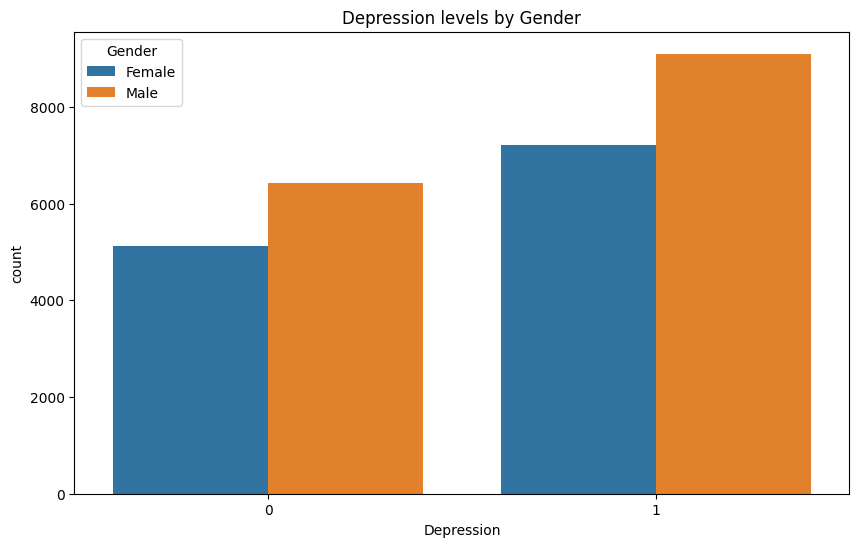

In [ ]:
# Visualize the relationship between 'Depression' and 'Gender'.
plt.figure(figsize=(10, 6))
sns.countplot(x='Depression', data=df, hue='Gender')
plt.title('Depression levels by Gender')
plt.show()

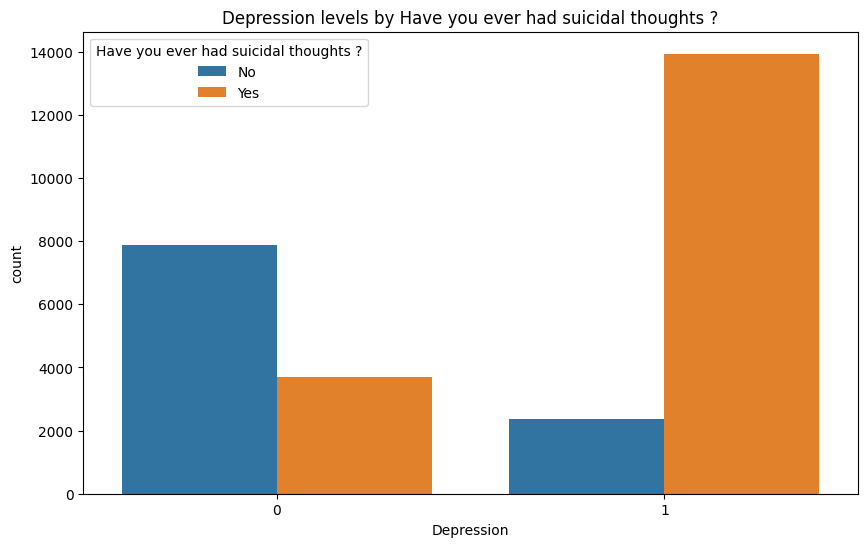

In [ ]:
# Visualize the relationship between 'Depression' and 'Have you ever had suicidal thoughts ?'.
plt.figure(figsize=(10, 6))
sns.countplot(x='Depression', data=df, hue='Have you ever had suicidal thoughts ?')
plt.title('Depression levels by Have you ever had suicidal thoughts ?')
plt.show()

Is there a correlation between academic pressure and depression?

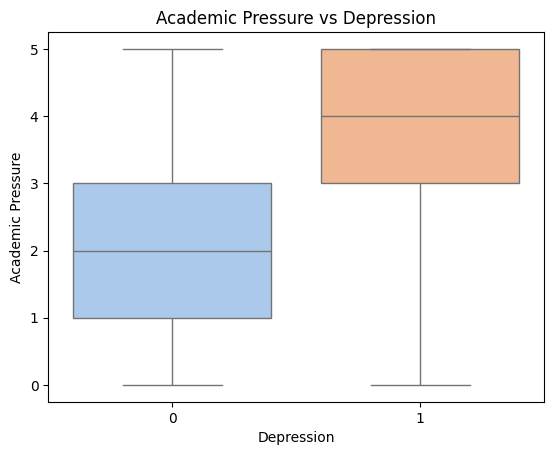

In [ ]:
sns.boxplot(x='Depression', y='Academic Pressure', data=df, hue='Depression', palette='pastel', legend=False)
plt.title('Academic Pressure vs Depression')
plt.xlabel('Depression')
plt.ylabel('Academic Pressure')
plt.show()

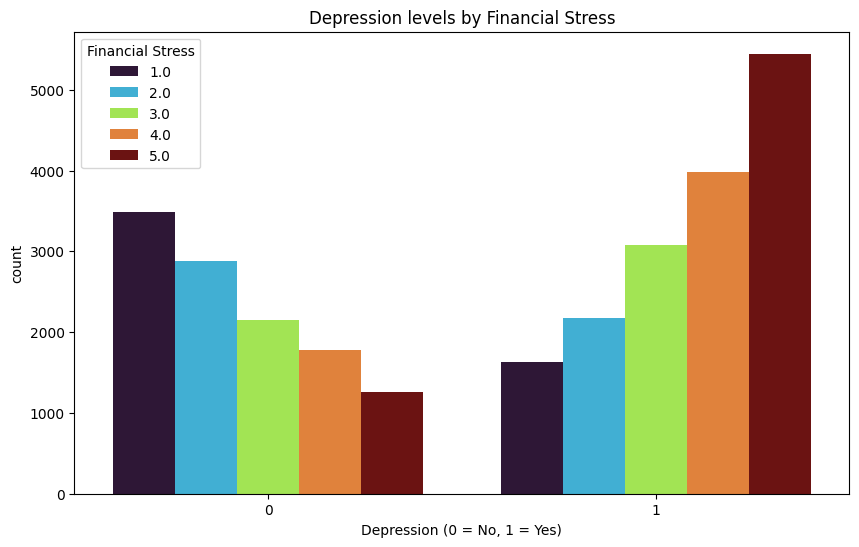

In [ ]:
# Visualize the relationship between 'Depression' and 'Financial Stress'.
plt.figure(figsize=(10, 6))
sns.countplot(x='Depression', data=df, hue='Financial Stress', palette='turbo')
plt.title('Depression levels by Financial Stress')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.show()

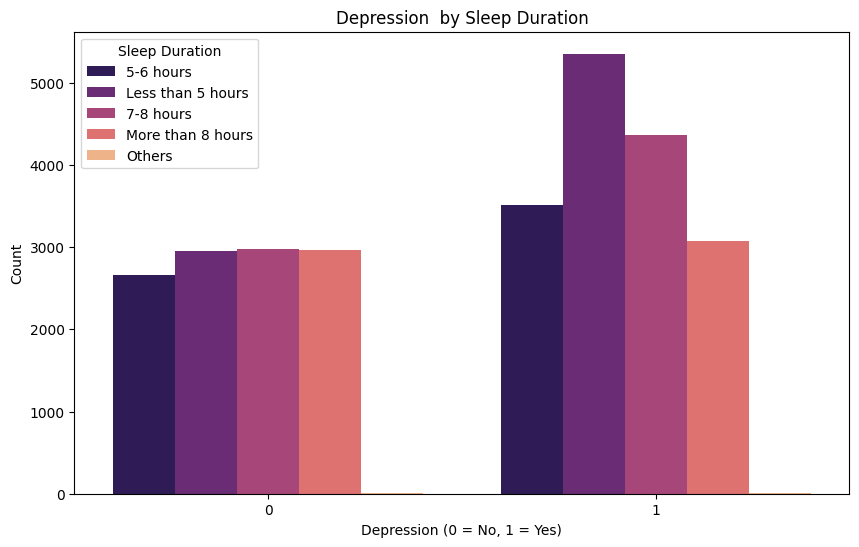

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Depression', data=df, hue='Sleep Duration', palette='magma')
plt.title('Depression  by Sleep Duration')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Sleep Duration')
plt.show()

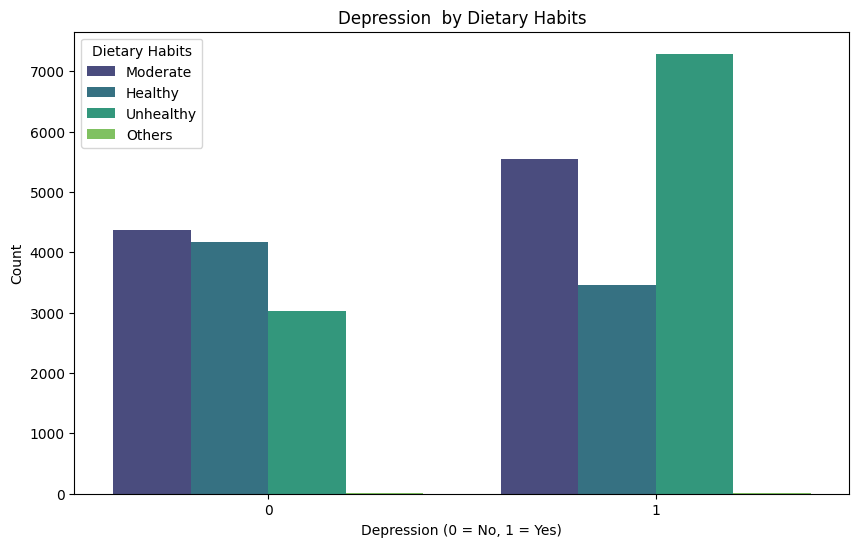

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Depression', data=df, hue='Dietary Habits', palette='viridis')
plt.title('Depression  by Dietary Habits')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Dietary Habits')
plt.show()

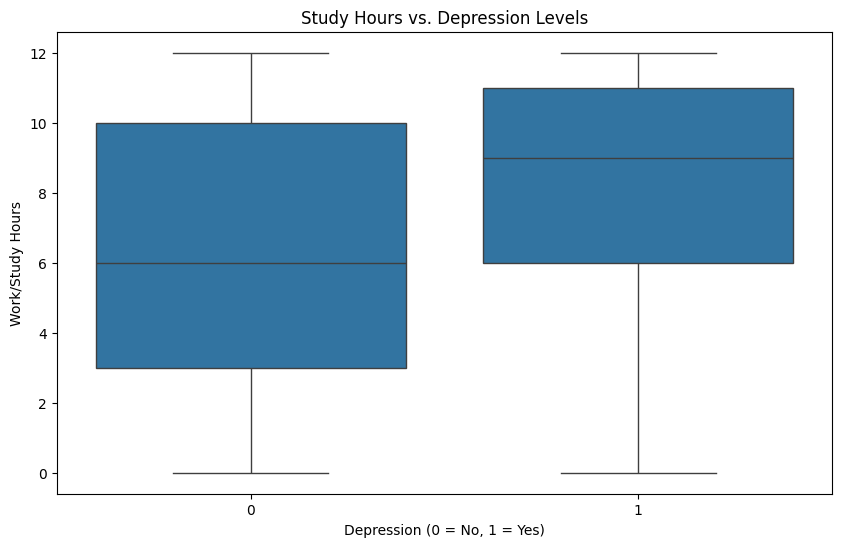

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Study Hours vs. Depression Levels')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Work/Study Hours')
plt.show()

<Axes: >

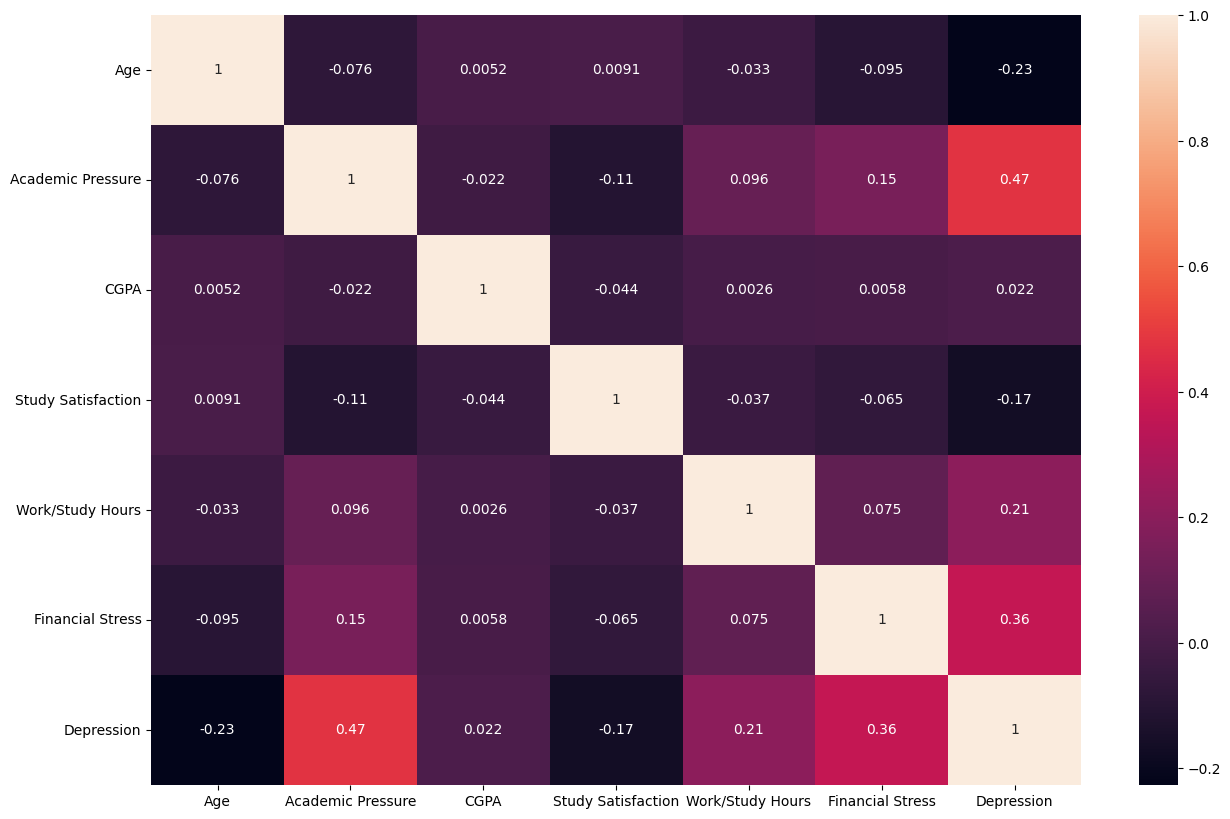

In [ ]:
df_numeric = df.select_dtypes(include=['number'])



plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(),annot=True)

# **Adding new variables**

In [ ]:
df['Academic pressure level'] = pd.cut(df['Academic Pressure'], bins=[0,3,5], labels=['Low', 'High'], include_lowest=True)

In [ ]:
df['financial stress level'] = pd.cut(df['Financial Stress'], bins=[0,3,5], labels=['Low', 'High'], include_lowest=True)

In [ ]:
df['Pressure_Performance_Ratio'] = df['Academic Pressure'] / df['CGPA']

In [ ]:
# Create a new column 'Depression_Label' with 'Yes' or 'No' values
df['Depression_Label'] = df['Depression'].map({1: 'Yes', 0: 'No'})



# Display the head of the DataFrame to show the new column
display(df.head())

,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Academic pressure level,financial stress level,Pressure_Performance_Ratio,Depression_Label
0,Male,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,High,Low,0.557414,Yes
1,Female,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0,Low,Low,0.338983,No
2,Male,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0,Low,Low,0.426743,No
3,Female,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1,Low,High,0.536673,Yes
4,Female,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0,High,Low,0.492005,No


# **Target variable**

**Those who are depressed - 1 Those who are not depressed- 0**

In [ ]:
df['Depression'].value_counts()

,count
Depression,
1,16308
0,11562


**Feature selection**

In [ ]:
df2 = df[[ 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',  'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'CGPA','Depression']].copy()
display(df2.head())

,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA,Depression
0,5.0,2.0,5-6 hours,Healthy,3.0,1.0,No,8.97,1
1,2.0,5.0,5-6 hours,Moderate,3.0,2.0,Yes,5.90,0
2,3.0,5.0,Less than 5 hours,Healthy,9.0,1.0,Yes,7.03,0
3,3.0,2.0,7-8 hours,Moderate,4.0,5.0,Yes,5.59,1
4,4.0,3.0,5-6 hours,Moderate,1.0,1.0,No,8.13,0


**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Dietary Habits','Family History of Mental Illness']
label_encoder=LabelEncoder()
for col in cols:
    df2[col]=label_encoder.fit_transform(df2[col])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cols=['Sleep Duration']
ordinal_encoder=OrdinalEncoder()
df2[cols]=ordinal_encoder.fit_transform(df2[cols])

In [ ]:
df2

,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family History of Mental Illness,CGPA,Depression
0,5.0,2.0,0.0,0,3.0,1.0,0,8.97,1
1,2.0,5.0,0.0,1,3.0,2.0,1,5.90,0
2,3.0,5.0,2.0,0,9.0,1.0,1,7.03,0
3,3.0,2.0,1.0,1,4.0,5.0,1,5.59,1
4,4.0,3.0,0.0,1,1.0,1.0,0,8.13,0
...,...,...,...,...,...,...,...,...,...
27896,5.0,5.0,0.0,3,7.0,1.0,1,5.75,0
27897,2.0,3.0,2.0,0,0.0,3.0,1,9.40,0
27898,3.0,4.0,0.0,3,12.0,2.0,0,6.61,0
27899,5.0,2.0,2.0,0,10.0,5.0,0,6.88,1


**Imbalanced dataset**

In [ ]:
#upsampling the dataset
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=42)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Academic Pressure                 27870 non-null  float64
 1   Study Satisfaction                27870 non-null  float64
 2   Sleep Duration                    27870 non-null  float64
 3   Dietary Habits                    27870 non-null  int64  
 4   Work/Study Hours                  27870 non-null  float64
 5   Financial Stress                  27870 non-null  float64
 6   Family History of Mental Illness  27870 non-null  int64  
 7   CGPA                              27870 non-null  float64
 8   Depression                        27870 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 2.1 MB


**Define dependent and independent variables**

In [ ]:
X = df2.drop('Depression', axis='columns')
y = df2['Depression']

In [ ]:
y

,Depression
0,1
1,0
2,0
3,1
4,0
...,...
27896,0
27897,0
27898,0
27899,1


In [ ]:
X, y = sm.fit_resample(X, y)

In [ ]:
X.shape

(32616, 8)

In [ ]:
y.shape

(32616,)

In [ ]:
y.value_counts()

,count
Depression,
1,16308
0,16308


**Split the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normalize the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)


In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.70027202,  0.74783922, -0.48136393, ..., -0.72897294,
        -0.92771628, -0.37742774],
       [ 1.42225442,  1.48678855, -0.48136393, ...,  1.35846025,
         1.07791576,  0.5402315 ],
       [ 1.42225442, -1.46900879,  0.45840291, ...,  0.66264919,
        -0.92771628, -0.2482757 ],
       ...,
       [-0.02171037,  1.48678855,  0.45840291, ...,  1.35846025,
         1.07791576,  0.15957285],
       [-1.46567515,  0.00888988,  0.45840291, ..., -1.424784  ,
        -0.92771628,  0.32950975],
       [ 0.70027202,  0.00888988, -1.42113076, ...,  1.35846025,
        -0.92771628, -0.42501007]])

In [ ]:
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.ensemble import GradientBoostingClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.ensemble import AdaBoostClassifier
 from sklearn.ensemble import ExtraTreesClassifier


# # Create the classification models
 models = [
     LogisticRegression(),
     DecisionTreeClassifier(),
     RandomForestClassifier(),
     KNeighborsClassifier(),
     AdaBoostClassifier(),
     ExtraTreesClassifier(),
     GradientBoostingClassifier()
 ]

In [ ]:
import time
from sklearn import metrics
def eval_model(algo,X,y):
    #fit the model
    start=time.time()
    algo.fit(X_train,y_train)
    y_pred=algo.predict(X_test)
    end = time.time()
    # evaluate the model
    name = algo.__class__.__name__
    acc =  metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    duration=end-start
    return [name,acc,prec,rec,f1,duration]

In [ ]:
results=[]
for algo in models:
    results.append(eval_model(algo,X,y))
performance=pd.DataFrame(results,columns=['Model','Accuracy','Precision','Recall','F1','Duration']).sort_values(by='Precision',ascending=False)
display(performance)

,Model,Accuracy,Precision,Recall,F1,Duration
6,GradientBoostingClassifier,0.809473,0.796522,0.819266,0.807734,3.090055
2,RandomForestClassifier,0.802882,0.792552,0.807970,0.800186,3.401901
5,ExtraTreesClassifier,0.792765,0.783968,0.794791,0.789342,4.104818
4,AdaBoostClassifier,0.794911,0.783502,0.801694,0.792494,0.959362
3,KNeighborsClassifier,0.780656,0.780511,0.766552,0.773468,0.386018
0,LogisticRegression,0.787860,0.779362,0.789143,0.784222,0.027671
1,DecisionTreeClassifier,0.731606,0.722843,0.730781,0.726790,0.177147


**Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

In [ ]:
rf.fit(X_train ,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3337
           1       0.79      0.81      0.80      3187

    accuracy                           0.80      6524
   macro avg       0.80      0.80      0.80      6524
weighted avg       0.81      0.80      0.80      6524



**Model Evaluation**

In [ ]:
predictions=rf.predict(X_test)

In [ ]:
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
rf.predict_proba(X_test)

array([[0.23, 0.77],
       [0.01, 0.99],
       [0.02, 0.98],
       ...,
       [0.27, 0.73],
       [0.98, 0.02],
       [0.09, 0.91]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,predictions)

In [ ]:
cm

array([[2670,  667],
       [ 606, 2581]])

<Axes: title={'center': 'Confusion Matrix'}>

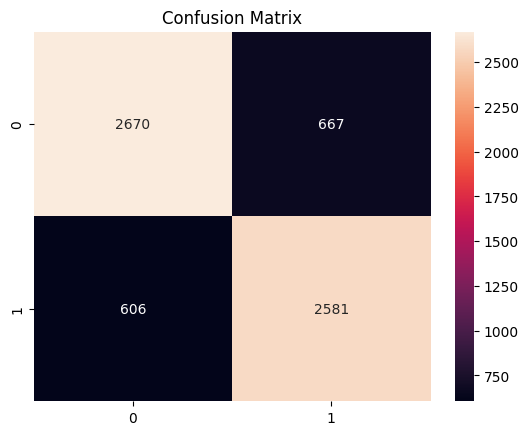

In [ ]:
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True,fmt="g")

**Classification report**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3337
           1       0.79      0.81      0.80      3187

    accuracy                           0.80      6524
   macro avg       0.80      0.80      0.80      6524
weighted avg       0.81      0.80      0.80      6524



**ROC- AUC curve**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_pred_prob=rf.predict_proba(X_test)[:,1]
y_pred_prob

array([0.77, 0.99, 0.98, ..., 0.73, 0.02, 0.91])

In [ ]:
auc=roc_auc_score(y_test,y_pred_prob)
auc

np.float64(0.8802713469529297)

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

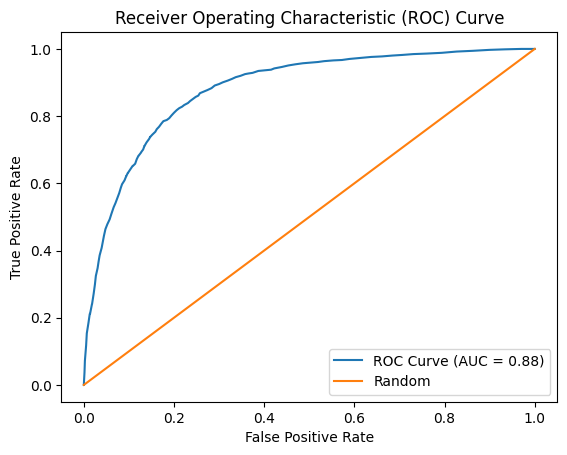

In [ ]:
#Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1],label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        95
           1       0.90      0.94      0.92       105

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.9135338345864661)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate

# # Generate a sample classification dataset (commented out to use the original df2 data)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# # Split the dataset into train and test sets (commented out to use the original split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the classification models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

# Evaluate models and compute variance
for model in models:
    # Ensure we use the X_train, y_train defined from df2 previously
    cv_results = cross_validate(model, X_train, y_train, cv=5, return_train_score=False)
    accuracy_scores = cv_results['test_score']
    mean_accuracy = np.mean(accuracy_scores)
    variance = np.var(accuracy_scores)

    print(f"Model: {type(model).__name__}")
    print(f"Cross-Validation Accuracy Scores: {accuracy_scores}")
    print(f"Mean Accuracy: {mean_accuracy:.3f}")
    print(f"Variance: {variance:.3f}\n")

    # Fit the model on the entire training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.3f}\n")

Model: LogisticRegression
Cross-Validation Accuracy Scores: [0.81875 0.83125 0.85625 0.8125  0.79375]
Mean Accuracy: 0.823
Variance: 0.000

Test Accuracy: 0.835

Model: DecisionTreeClassifier
Cross-Validation Accuracy Scores: [0.85625 0.8875  0.8875  0.90625 0.88125]
Mean Accuracy: 0.884
Variance: 0.000

Test Accuracy: 0.890

Model: RandomForestClassifier
Cross-Validation Accuracy Scores: [0.91875 0.89375 0.9375  0.9375  0.9375 ]
Mean Accuracy: 0.925
Variance: 0.000

Test Accuracy: 0.955



In [ ]:
# 5. GET FEATURE IMPORTANCE
importances = rf.feature_importances_


# df2 is the DataFrame containing the processed features before the split and SMOTE
feature_names = df2.drop('Depression', axis=1).columns

# Combine into a dataframe
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Display the feature importances
print("Feature Importances:")
display(feat_imp_df.sort_values(by='Importance', ascending=False))

Feature Importances:


,Feature,Importance
7,CGPA,0.238266
0,Academic Pressure,0.235620
5,Financial Stress,0.154343
4,Work/Study Hours,0.140981
1,Study Satisfaction,0.084932
2,Sleep Duration,0.071409
3,Dietary Habits,0.050983
6,Family History of Mental Illness,0.023466


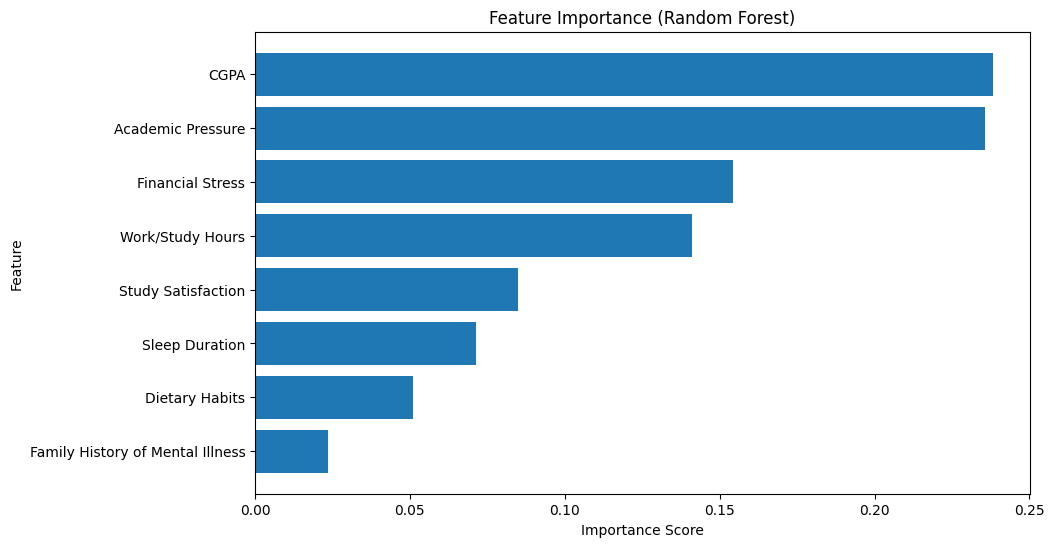

In [ ]:
feat_imp_df_sorted = feat_imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df_sorted["Feature"], feat_imp_df_sorted["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

**Hyperparameter Tuning**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(2, 20)

}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=np.int64(4),
                                              min_samples_leaf=np.int64(2),
                                              min_samples_split=np.int64(2),
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='recall')

In [ ]:
# Access the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best cross-validated accuracy:", best_score)

# Evaluate the best model on the test set
best_model_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy using the best model:", best_model_accuracy)

Best hyperparameters: {'criterion': 'gini', 'max_depth': np.int64(8), 'min_samples_leaf': np.int64(5), 'min_samples_split': np.int64(2)}
Best cross-validated accuracy: 0.9204819277108435
Test set accuracy using the best model: 0.92


**Use the best parameters**

In [ ]:
dtc = DecisionTreeClassifier(random_state=42, **best_params)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(8), min_samples_leaf=np.int64(5),
                       min_samples_split=np.int64(2), random_state=42)

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       112
           1       0.94      0.88      0.91        88

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.8671679197994987)

**prediction using logistic regression**

Which of the variables 'Financial Stress', 'Academic Pressure', 'Study Satisfaction', and 'Work/Study Hours' are statistically significanton the likelihood of developing depression?"

In [ ]:
import statsmodels.formula.api as smf

model = smf.logit('Depression ~ Q(\'Financial Stress\') + Q(\'Academic Pressure\')  + Q(\'Study Satisfaction\') + Q(\'Work/Study Hours\')', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.477916
         Iterations 6


In [ ]:
df['predicted_prob'] = model.predict(df)
df['predicted_class'] = (df['predicted_prob'] >= 0.2).astype(int)

In [ ]:
ll_null = model.llnull
ll_model = model.llf
mcfadden_r2 = 1 - (ll_model / ll_null)

In [ ]:
conf_matrix = confusion_matrix(df['Depression'], df['predicted_class'])
auc_score = roc_auc_score(df['Depression'], df['predicted_prob'])

In [ ]:
fpr, tpr, thresholds = roc_curve(df['Depression'], df['predicted_prob'])

In [ ]:
model_summary = model.summary2().tables[1]
result_summary = {
    "Odds Ratios": np.exp(model.params).round(3),
    "McFadden R2": round(mcfadden_r2, 3),
    "AIC": round(model.aic, 2),
    "BIC": round(model.bic, 2),
    "Confusion Matrix": conf_matrix.tolist(),
    "ROC AUC": round(auc_score, 3),
    "Model Coefficients Summary": model_summary
}

# Explicitly display the Odds Ratios and the model summary table for clarity
print("Odds Ratios:")
display(result_summary["Odds Ratios"])

print("\nModel Coefficients Summary:")
display(result_summary["Model Coefficients Summary"])

print("\nOther Model Metrics:")
print(f"McFadden R2: {result_summary['McFadden R2']}")
print(f"AIC: {result_summary['AIC']}")
print(f"BIC: {result_summary['BIC']}")
print(f"ROC AUC: {result_summary['ROC AUC']}")

Odds Ratios:


,0
Intercept,0.017
Q('Financial Stress'),1.775
Q('Academic Pressure'),2.285
Q('Study Satisfaction'),0.800
Q('Work/Study Hours'),1.124



Model Coefficients Summary:


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-4.071524,0.072807,-55.922018,0.000000e+00,-4.214223,-3.928824
Q('Financial Stress'),0.573525,0.011152,51.426664,0.000000e+00,0.551667,0.595383
Q('Academic Pressure'),0.826261,0.012382,66.733062,0.000000e+00,0.801994,0.850528
Q('Study Satisfaction'),-0.222951,0.011274,-19.775058,4.882653e-87,-0.245049,-0.200854
Q('Work/Study Hours'),0.117188,0.004135,28.338996,1.143809e-176,0.109083,0.125293



Other Model Metrics:
McFadden R2: 0.296
AIC: 26649.01
BIC: 26690.19
ROC AUC: 0.846


The logistic regression results indicate that financial stress, academic pressure, and work/study hours significantly increase the likelihood of a positive depression outcome, while study satisfaction exerts a significant protective effect. Academic pressure emerged as the strongest predictor, more than doubling the odds of a positive outcome. All predictors were statistically significant (p < 0.001), highlighting the multifactorial nature of depression among students.”